In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Membaca dataset
data = pd.read_csv('/content/dataset baru.csv', encoding='latin1', delimiter=';')

In [ ]:
# Ubah format tahun-kuartal menjadi format datetime
data['Date'] = pd.to_datetime(data['Date'].str.replace('/', '-'), format='%d-%m-%Y')

In [ ]:
# Cek daftar kolom
print(data.columns)

# Memilih variabel yang akan digunakan untuk memprediksi pendapatan perusahaan
X = data[['Debt-to-Equity', 'Earnings per Share', 'Net Margin Profit', 'Net Income', 'Assets', 'Liabilities', 'Equity']]
y = data['Revenue']

# Cetak hasil pemilihan kolom
print(X)
print(y)

Index(['Companies', 'Date', 'Revenue', 'Net Income', 'Assets',
       'non-current assets', 'Liabilities', 'Equity', 'Shares outstanding',
       'Debt-to-Equity', 'Current Ratio', 'Earnings per Share',
       'Return On Capital Employed', 'Net Margin Profit',
       'Inventory Turnover Ratio'],
      dtype='object')
      Debt-to-Equity  Earnings per Share  Net Margin Profit  Net Income  \
0               0.00              545.63              36.32         827   
1               0.00              505.39              32.44         770   
2               0.00              349.81              25.91         532   
3               0.00              323.58              34.22         501   
4               0.00              143.65              15.51         218   
...              ...                 ...                ...         ...   
1339            0.05              243.28              19.20         896   
1340            0.05              100.88               8.74         371   
1341  

In [ ]:
# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat objek imputer untuk data fitur
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Melakukan imputasi pada data latih dan data uji untuk fitur
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Membuat objek imputer untuk kolom target
target_imputer = SimpleImputer(strategy='mean')

In [ ]:
# Melakukan imputasi pada kolom target
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# Konversi kembali ke Series
y_train_imputed = pd.Series(y_train_imputed.flatten(), index=y_train.index)

In [ ]:
# Fungsi untuk menghitung dan menyimpan lower bound dan upper bound
def calculate_bounds(df, columns):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)
    return bounds

# Fungsi untuk menghapus outliers berdasarkan bounds yang telah dihitung
def remove_outliers(df, bounds):
    for col, (lower_bound, upper_bound) in bounds.items():
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Pilih kolom yang ingin diperiksa untuk outliers
selected_columns = ['Debt-to-Equity', 'Earnings per Share', 'Net Margin Profit']

# Hitung bounds untuk kolom-kolom yang dipilih
bounds = calculate_bounds(data, selected_columns)

# Hapus outliers berdasarkan bounds yang telah dihitung
data_cleaned = remove_outliers(data, bounds)

print("Bounds:", bounds)
print("Cleaned Data:")
print(data_cleaned)

Bounds: {'Debt-to-Equity': (-0.81, 1.5100000000000002), 'Earnings per Share': (-280.23125, 499.09875), 'Net Margin Profit': (-9.30625, 28.30375)}
Cleaned Data:
     Companies       Date  Revenue  Net Income  Assets  non-current assets  \
2         AALI 2008-07-01     2052         532    3283                4421   
4         AALI 2009-01-01     1408         218    2219                4820   
5         AALI 2009-04-01     2129         552    2382                5147   
6         AALI 2009-07-01     1925         478    2404                5437   
7         AALI 2009-10-01     1961         413    1714                5857   
...        ...        ...      ...         ...     ...                 ...   
1339      INTP 2022-10-01     4667         896   10312               15394   
1340      INTP 2023-01-01     4246         371   10288               15150   
1341      INTP 2023-04-01     3724         327    9800               15107   
1342      INTP 2023-07-01     4958         569   10877      

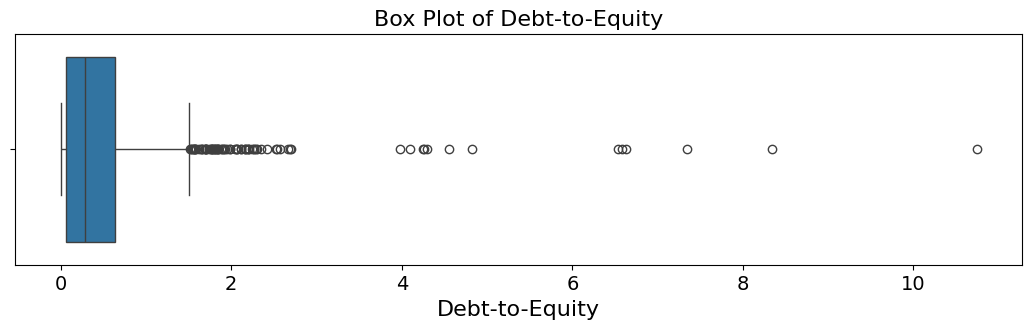

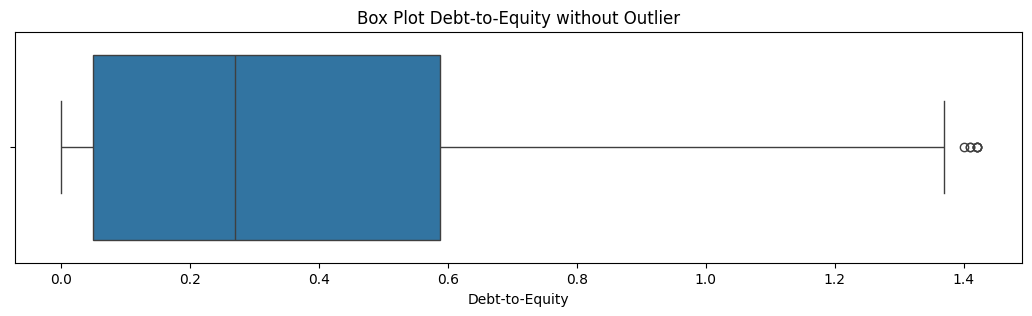


Comparison of Descriptive Statistics for Debt-to-Equity:

       With Outliers  Without Outliers
count    1344.000000       1082.000000
mean        0.485759          0.357532
std         0.746418          0.341181
min         0.000000          0.000000
25%         0.060000          0.050000
50%         0.290000          0.270000
75%         0.640000          0.587500
max        10.740000          1.420000
IQR         0.580000          0.550000


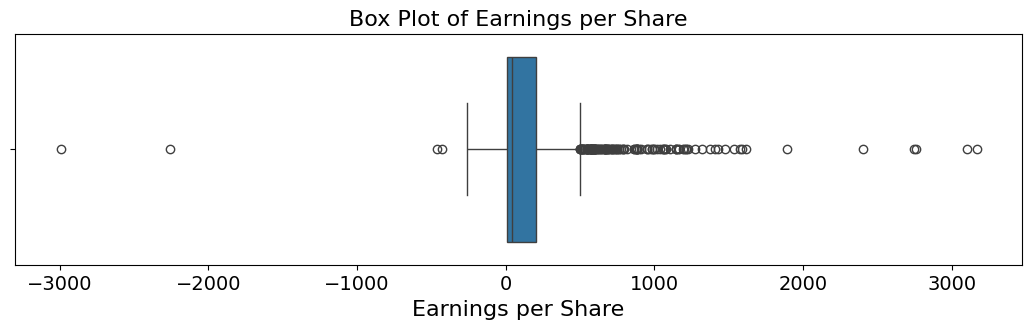

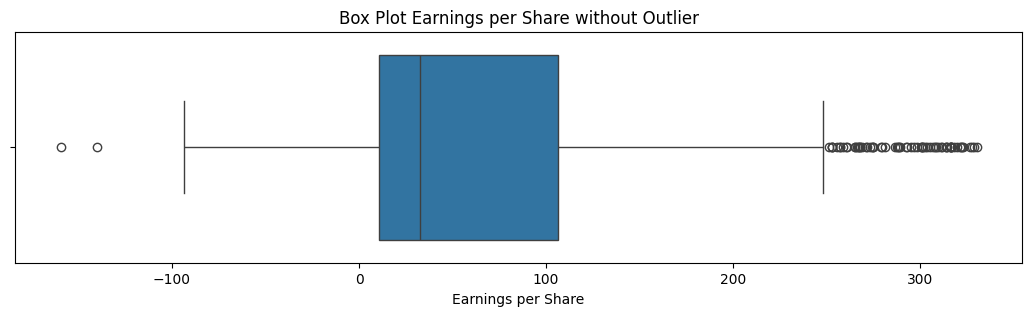


Comparison of Descriptive Statistics for Earnings per Share:

       With Outliers  Without Outliers
count    1344.000000       1014.000000
mean      163.388021         68.813619
std       324.317585         87.861956
min     -2992.340000       -159.470000
25%        12.017500         10.772500
50%        45.930000         32.445000
75%       206.850000        106.297500
max      3167.580000        330.080000
IQR       194.832500        128.420000


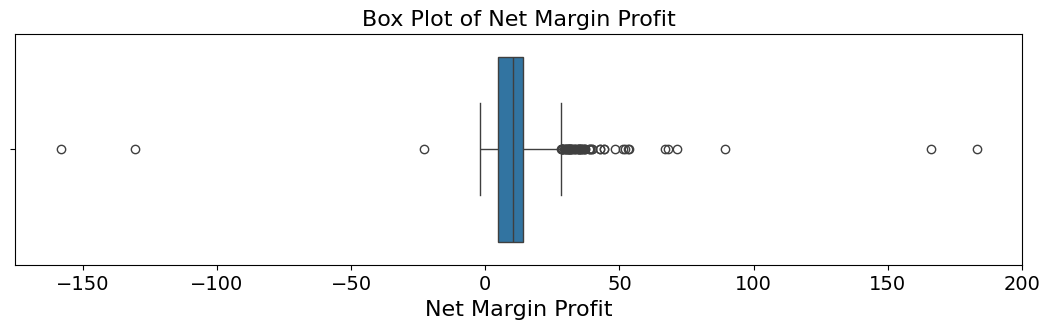

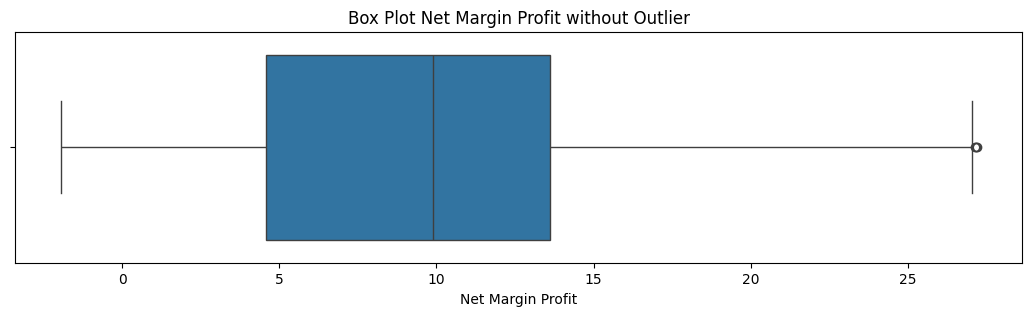


Comparison of Descriptive Statistics for Net Margin Profit:

       With Outliers  Without Outliers
count    1344.000000       1088.000000
mean       11.048490          9.867711
std        12.382695          6.233877
min      -158.200000         -1.960000
25%         4.797500          4.577500
50%        10.210000          9.885000
75%        14.200000         13.602500
max       183.100000         27.190000
IQR         9.402500          9.067500


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Q1, Q3, IQR, lower_bound, upper_bound

def plot_boxplot_with_outliers(column_name, data):
    plt.figure(figsize=(13, 3))
    sns.boxplot(x=column_name, data=data)
    plt.title(f'Box Plot of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=16)
    plt.xticks(fontsize=14)
    plt.show()

def plot_boxplot_without_outliers(column_name, data):
    Q1, Q3, IQR, lower_bound, upper_bound = calculate_iqr_bounds(data[column_name])
    no_outlier = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    plt.figure(figsize=(13, 3))
    sns.boxplot(x=column_name, data=no_outlier)
    plt.title(f'Box Plot {column_name} without Outlier')
    plt.show()
    return no_outlier, Q1, Q3, IQR

def compare_descriptive_statistics(column_name, data_with_outliers, data_without_outliers, Q1_with_outliers, Q3_with_outliers, IQR_with_outliers, Q1_without_outliers, Q3_without_outliers, IQR_without_outliers):
    desc_with_outliers = data_with_outliers[column_name].describe()
    desc_without_outliers = data_without_outliers[column_name].describe()

    comparison_df = pd.DataFrame({
        'With Outliers': desc_with_outliers,
        'Without Outliers': desc_without_outliers
    })

    # Tambahkan IQR ke dalam DataFrame
    comparison_df.loc['IQR'] = [IQR_with_outliers, IQR_without_outliers]

    print(f'\nComparison of Descriptive Statistics for {column_name}:\n')
    print(comparison_df)

# List of columns to analyze
columns_to_analyze = ['Debt-to-Equity', 'Earnings per Share', 'Net Margin Profit']

for column in columns_to_analyze:
    # Plot boxplots using original data (with outliers)
    plot_boxplot_with_outliers(column, data)

    # Plot boxplots using cleaned data (without outliers)
    no_outlier_data, Q1_no_outliers, Q3_no_outliers, IQR_no_outliers = plot_boxplot_without_outliers(column, data_cleaned)

    # Calculate IQR for the data with outliers
    Q1_with_outliers, Q3_with_outliers, IQR_with_outliers, _, _ = calculate_iqr_bounds(data[column])

    # Compare descriptive statistics
    compare_descriptive_statistics(
        column,
        data,
        no_outlier_data,
        Q1_with_outliers,
        Q3_with_outliers,
        IQR_with_outliers,
        Q1_no_outliers,
        Q3_no_outliers,
        IQR_no_outliers
    )
